In [1]:
##Importing the data from csv files into a dataframe

import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path =r'C:\Users\Piyushkumar\Documents\GitHub\predictcritical\thermalpower' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)

frame.describe(include=['O'])
frame.info()
df= frame.copy()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121446 entries, 0 to 2669
Data columns (total 17 columns):
Date                                   121446 non-null object
Region                                 121446 non-null object
Station Name                           121446 non-null object
Mode of Transport                      121446 non-null object
Station Name.1                         121446 non-null object
Utility                                121446 non-null object
Sector                                 121446 non-null object
Capacity                               121446 non-null float64
Normative Stocks Required (In Days)    121446 non-null float64
Daily Requirement                      121446 non-null float64
Actual Stock - Import                  121446 non-null float64
Actual Stock - Indigenous              121446 non-null float64
Actual Stock - Total                   121446 non-null float64
Actual Stock - Days                    121446 non-null int64
Critical          

,Date,Region,Station Name,Mode of Transport,Station Name.1,Utility,Sector,Capacity,Normative Stocks Required (In Days),Daily Requirement,Actual Stock - Import,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days,Critical,Super Critical,Remarks
0,2009-04-01,NORTHERN,DELHI,RAIL,I.P. T.P.S.,INDRAPRASTHA POWER GENERATION COMPANY LIMITED,STATE,247.5,25.0,3.2,0.0,57.03,57.03,18,NaN,NaN,NaN
1,2009-04-01,NORTHERN,DELHI,RAIL,RAJGHAT TPS,INDRAPRASTHA POWER GENERATION COMPANY LIMITED,STATE,135.0,25.0,2.2,0.0,105.08,105.08,48,NaN,NaN,NaN
2,2009-04-01,NORTHERN,DELHI,RAIL,BADARPUR TPS,NTPC LIMITED.,CENTRAL,705.0,30.0,13.8,0.0,13.17,13.17,1,Critical,Super Critical,NaN
3,2009-04-01,NORTHERN,HARYANA,RAIL,FARIDABAD TPS.,HARYANA POWER GENERATION CORPORATION LIMITED,STATE,55.0,25.0,2.0,0.0,14.96,14.96,7,NaN,NaN,NaN
4,2009-04-01,NORTHERN,HARYANA,RAIL,PANIPAT TPS,HARYANA POWER GENERATION CORPORATION LIMITED,STATE,1360.0,25.0,25.0,0.0,111.27,111.27,4,Critical,NaN,NaN


In [2]:
#working with data

#df = df.set_index(df['Date'])
#df= df.drop('Date', axis = 1)
all_days = pd.date_range(df.index.min(), df.index.max(), freq='D')
df.head()

#Reset the index to numerical ontinous number stream
df.reset_index(drop=True, inplace=True)

In [3]:
#Checking what constitutes critical and Super critical states

df.describe(include='all')
df[df.Critical.notnull()].head(5000)[df['Actual Stock - Days'] >= 6]

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Date,Region,Station Name,Mode of Transport,Station Name.1,Utility,Sector,Capacity,Normative Stocks Required (In Days),Daily Requirement,Actual Stock - Import,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days,Critical,Super Critical,Remarks
5,2009-04-01,NORTHERN,HARYANA,RAIL,YAMUNA NAGAR TPS,HARYANA POWER GENERATION CORPORATION LIMITED,STATE,600.0,25.0,10.0,0.00,59.82,59.82,6,Critical,NaN,NaN
12,2009-04-01,NORTHERN,UTTAR PRADESH,RAIL,HARDUAGANJ TPS,UTTAR PRADESH RAJYA VIDYUT UTPADAN NIGAM LIMITED,STATE,665.0,25.0,3.0,0.00,16.63,16.63,6,Critical,NaN,NaN
46,2009-04-01,SOUTHERN,ANDHRA PRADESH,RAIL,RAYALASEEMA TPS,ANDHRA PRADESH POWER GENERATION CORP. LIMITED.,STATE,1050.0,25.0,15.8,0.00,90.56,90.56,6,Critical,NaN,NaN
69,2009-04-01,EASTERN,WEST BENGAL,RAIL,D.P.L. TPS,DURGAPUR PROJECTS LIMITED,STATE,630.0,20.0,10.0,0.00,56.95,56.95,6,Critical,NaN,NaN
87,2009-04-02,SOUTHERN,ANDHRA PRADESH,RAIL,RAYALASEEMA TPS,ANDHRA PRADESH POWER GENERATION CORP. LIMITED.,STATE,1050.0,25.0,15.8,0.00,93.59,93.59,6,Critical,NaN,NaN
96,2009-04-02,EASTERN,BIHAR,RAIL,BARAUNI TPS,BIHAR STATE ELECTRICITY BOARD,STATE,210.0,20.0,0.7,0.00,3.70,3.70,6,Critical,NaN,NaN
110,2009-04-02,EASTERN,WEST BENGAL,RAIL,D.P.L. TPS,DURGAPUR PROJECTS LIMITED,STATE,630.0,20.0,10.0,0.00,63.79,63.79,6,Critical,NaN,NaN
124,2009-04-02,NORTHERN,HARYANA,RAIL,YAMUNA NAGAR TPS,HARYANA POWER GENERATION CORPORATION LIMITED,STATE,600.0,25.0,10.0,18.14,38.76,56.90,6,Critical,NaN,NaN
161,2009-04-03,NORTHERN,HARYANA,RAIL,YAMUNA NAGAR TPS,HARYANA POWER GENERATION CORPORATION LIMITED,STATE,600.0,25.0,10.0,22.14,38.20,60.34,6,Critical,NaN,NaN
202,2009-04-03,SOUTHERN,ANDHRA PRADESH,RAIL,RAYALASEEMA TPS,ANDHRA PRADESH POWER GENERATION CORP. LIMITED.,STATE,1050.0,25.0,15.8,0.00,94.05,94.05,6,Critical,NaN,NaN


In [4]:
df[df.Critical.notnull()].head(5000)[df['Actual Stock - Days'] >= 7]

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Date,Region,Station Name,Mode of Transport,Station Name.1,Utility,Sector,Capacity,Normative Stocks Required (In Days),Daily Requirement,Actual Stock - Import,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days,Critical,Super Critical,Remarks


In [3]:
##**A plant is tagged ciritical when the available stock for number of days goes below 7 days and Super Critical when stock below 3 days**

In [4]:
#We already have a good amount of structured data, however changing the data type form object to category,date time and integrer will help us process the data

df['Date'] = pd.to_datetime(df['Date'])
df['Region'] = df['Region'].astype('category')
df['Station Name'] = df['Station Name'].astype('category')
df['Mode of Transport'] = df['Mode of Transport'].astype('category')
df['Station Name.1'] = df['Station Name.1'].astype('category')
df['Utility'] = df['Utility'].astype('category')
df['Sector'] = df['Sector'].astype('category')
df['Critical'] = df['Critical'].map({'Critical': 1})
df['Super Critical'] = df['Super Critical'].map({'Super Critical': 1})
df['Critical'].fillna(value = 0, inplace =True)
df['Super Critical'].fillna(value = 0, inplace =True)
df.describe(include='all')


,Date,Region,Station Name,Mode of Transport,Station Name.1,Utility,Sector,Capacity,Normative Stocks Required (In Days),Daily Requirement,Actual Stock - Import,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days,Critical,Super Critical,Remarks
count,121446,121446,121446,121446,121446,121446,121446,121446.000000,121446.000000,121446.000000,121446.000000,121446.000000,121446.000000,121446.000000,121446.000000,121446.000000,30506
unique,1461,4,16,4,100,35,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70
top,2012-03-18 00:00:00,EASTERN,WEST BENGAL,RAIL,ROPAR TPS,NTPC LIMITED.,STATE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less Receipt
freq,95,35445,19325,91079,1461,21900,76107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11581
first,2009-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1129.157873,22.591906,13.994799,3.676711,133.287357,136.964021,12.348451,0.373154,0.208438,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,803.700708,5.256800,10.880320,15.370966,140.712095,140.632403,11.547079,0.483644,0.406193,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,15.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.000000,20.000000,6.400000,0.000000,34.730000,38.040000,4.000000,0.000000,0.000000,NaN


In [6]:
#Checking whether the data conversion activity did not corrupt our labels

df[df.Critical == 1].head(5000)[df['Actual Stock - Days'] >= 7]
values = df[df.Critical == 1]
values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45318 entries, 2 to 121445
Data columns (total 17 columns):
Date                                   45318 non-null datetime64[ns]
Region                                 45318 non-null category
Station Name                           45318 non-null category
Mode of Transport                      45318 non-null category
Station Name.1                         45318 non-null category
Utility                                45318 non-null category
Sector                                 45318 non-null category
Capacity                               45318 non-null float64
Normative Stocks Required (In Days)    45318 non-null float64
Daily Requirement                      45318 non-null float64
Actual Stock - Import                  45318 non-null float64
Actual Stock - Indigenous              45318 non-null float64
Actual Stock - Total                   45318 non-null float64
Actual Stock - Days                    45318 non-null int64
Critical   

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [220]:
df.groupby('Station Name.1').tail(5000)

,Date,Region,Station Name,Mode of Transport,Station Name.1,Utility,Sector,Capacity,Normative Stocks Required (In Days),Daily Requirement,Actual Stock - Import,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days,Critical,Super Critical,Remarks
0,2009-04-01,NORTHERN,DELHI,RAIL,I.P. T.P.S.,INDRAPRASTHA POWER GENERATION COMPANY LIMITED,STATE,247.5,25.0,3.2,0.00,57.03,57.03,18,0.0,0.0,NaN
1,2009-04-01,NORTHERN,DELHI,RAIL,RAJGHAT TPS,INDRAPRASTHA POWER GENERATION COMPANY LIMITED,STATE,135.0,25.0,2.2,0.00,105.08,105.08,48,0.0,0.0,NaN
2,2009-04-01,NORTHERN,DELHI,RAIL,BADARPUR TPS,NTPC LIMITED.,CENTRAL,705.0,30.0,13.8,0.00,13.17,13.17,1,1.0,1.0,NaN
3,2009-04-01,NORTHERN,HARYANA,RAIL,FARIDABAD TPS.,HARYANA POWER GENERATION CORPORATION LIMITED,STATE,55.0,25.0,2.0,0.00,14.96,14.96,7,0.0,0.0,NaN
4,2009-04-01,NORTHERN,HARYANA,RAIL,PANIPAT TPS,HARYANA POWER GENERATION CORPORATION LIMITED,STATE,1360.0,25.0,25.0,0.00,111.27,111.27,4,1.0,0.0,NaN
5,2009-04-01,NORTHERN,HARYANA,RAIL,YAMUNA NAGAR TPS,HARYANA POWER GENERATION CORPORATION LIMITED,STATE,600.0,25.0,10.0,0.00,59.82,59.82,6,1.0,0.0,NaN
6,2009-04-01,NORTHERN,PUNJAB,RAIL,GH TPS (LEH.MOH.),PUNJAB STATE POWER CORP. LTD.,STATE,920.0,30.0,14.5,0.00,36.95,36.95,3,1.0,1.0,NaN
7,2009-04-01,NORTHERN,PUNJAB,RAIL,GND TPS(BHATINDA),PUNJAB STATE POWER CORP. LTD.,STATE,440.0,30.0,6.5,0.00,82.63,82.63,13,0.0,0.0,NaN
8,2009-04-01,NORTHERN,PUNJAB,RAIL,ROPAR TPS,PUNJAB STATE POWER CORP. LTD.,STATE,1260.0,30.0,20.7,0.00,177.84,177.84,9,0.0,0.0,NaN
9,2009-04-01,NORTHERN,RAJASTHAN,RAIL,KOTA TPS,RAJASTHAN RAJYA VIDYUT UTPADAN NIGAM LIMITED,STATE,1240.0,30.0,20.2,0.00,230.95,230.95,11,0.0,0.0,NaN


In [251]:
df[df.Critical.isnull()].head()

,Date,Region,Station Name,Mode of Transport,Station Name.1,Utility,Sector,Capacity,Normative Stocks Required (In Days),Daily Requirement,Actual Stock - Import,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days,Critical,Super Critical,Remarks


In [5]:
df.set_index(df['Date'], inplace=True)
df.head()


,Date,Region,Station Name,Mode of Transport,Station Name.1,Utility,Sector,Capacity,Normative Stocks Required (In Days),Daily Requirement,Actual Stock - Import,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days,Critical,Super Critical,Remarks
Date,,,,,,,,,,,,,,,,,
2009-04-01,2009-04-01,NORTHERN,DELHI,RAIL,I.P. T.P.S.,INDRAPRASTHA POWER GENERATION COMPANY LIMITED,STATE,247.5,25.0,3.2,0.0,57.03,57.03,18,0.0,0.0,NaN
2009-04-01,2009-04-01,NORTHERN,DELHI,RAIL,RAJGHAT TPS,INDRAPRASTHA POWER GENERATION COMPANY LIMITED,STATE,135.0,25.0,2.2,0.0,105.08,105.08,48,0.0,0.0,NaN
2009-04-01,2009-04-01,NORTHERN,DELHI,RAIL,BADARPUR TPS,NTPC LIMITED.,CENTRAL,705.0,30.0,13.8,0.0,13.17,13.17,1,1.0,1.0,NaN
2009-04-01,2009-04-01,NORTHERN,HARYANA,RAIL,FARIDABAD TPS.,HARYANA POWER GENERATION CORPORATION LIMITED,STATE,55.0,25.0,2.0,0.0,14.96,14.96,7,0.0,0.0,NaN
2009-04-01,2009-04-01,NORTHERN,HARYANA,RAIL,PANIPAT TPS,HARYANA POWER GENERATION CORPORATION LIMITED,STATE,1360.0,25.0,25.0,0.0,111.27,111.27,4,1.0,0.0,NaN


In [6]:
df.drop('Date',axis =1, inplace =True)
df.head()

,Region,Station Name,Mode of Transport,Station Name.1,Utility,Sector,Capacity,Normative Stocks Required (In Days),Daily Requirement,Actual Stock - Import,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days,Critical,Super Critical,Remarks
Date,,,,,,,,,,,,,,,,
2009-04-01,NORTHERN,DELHI,RAIL,I.P. T.P.S.,INDRAPRASTHA POWER GENERATION COMPANY LIMITED,STATE,247.5,25.0,3.2,0.0,57.03,57.03,18,0.0,0.0,NaN
2009-04-01,NORTHERN,DELHI,RAIL,RAJGHAT TPS,INDRAPRASTHA POWER GENERATION COMPANY LIMITED,STATE,135.0,25.0,2.2,0.0,105.08,105.08,48,0.0,0.0,NaN
2009-04-01,NORTHERN,DELHI,RAIL,BADARPUR TPS,NTPC LIMITED.,CENTRAL,705.0,30.0,13.8,0.0,13.17,13.17,1,1.0,1.0,NaN
2009-04-01,NORTHERN,HARYANA,RAIL,FARIDABAD TPS.,HARYANA POWER GENERATION CORPORATION LIMITED,STATE,55.0,25.0,2.0,0.0,14.96,14.96,7,0.0,0.0,NaN
2009-04-01,NORTHERN,HARYANA,RAIL,PANIPAT TPS,HARYANA POWER GENERATION CORPORATION LIMITED,STATE,1360.0,25.0,25.0,0.0,111.27,111.27,4,1.0,0.0,NaN


In [7]:
#Filling date entries for each station name in case it is missed 

def reindex_by_date(df):
    dates = pd.date_range(df.index.min(), df.index.max())
    return df.reindex(dates).fillna(method ='ffill' )

df1 = df.groupby('Station Name.1').apply(reindex_by_date)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 121887 entries, (AMAR KANTAK, 2009-01-01 00:00:00) to (YAMUNA NAGAR TPS, 2012-12-31 00:00:00)
Data columns (total 16 columns):
Region                                 121887 non-null category
Station Name                           121887 non-null category
Mode of Transport                      121887 non-null category
Station Name.1                         121887 non-null category
Utility                                121887 non-null category
Sector                                 121887 non-null category
Capacity                               121887 non-null float64
Normative Stocks Required (In Days)    121887 non-null float64
Daily Requirement                      121887 non-null float64
Actual Stock - Import                  121887 non-null float64
Actual Stock - Indigenous              121887 non-null float64
Actual Stock - Total                   121887 non-null float64
Actual Stock - Days                    121887 non-null float6

In [8]:
#df1.drop('Date',axis =1, inplace=True)
df1.drop('Station Name.1',axis =1, inplace=True)
df1 = df1.reset_index()

In [9]:
df1.describe(include='all')

,Station Name.1,level_1,Region,Station Name,Mode of Transport,Utility,Sector,Capacity,Normative Stocks Required (In Days),Daily Requirement,Actual Stock - Import,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days,Critical,Super Critical,Remarks
count,121887,121887,121887,121887,121887,121887,121887,121887.000000,121887.000000,121887.000000,121887.000000,121887.000000,121887.000000,121887.000000,121887.000000,121887.000000,113378
unique,100,1461,4,16,4,35,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70
top,YAMUNA NAGAR TPS,2012-03-26 00:00:00,EASTERN,WEST BENGAL,RAIL,NTPC LIMITED.,STATE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less Receipt
freq,1461,95,35625,19434,91480,21915,76329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45010
first,NaN,2009-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1128.054308,22.592193,13.979022,3.665533,133.133679,136.799165,12.345697,0.373174,0.208464,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,803.338267,5.252886,10.873091,15.346892,140.605019,140.530827,11.550393,0.483650,0.406212,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,15.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.000000,20.000000,6.400000,0.000000,34.720000,38.030000,4.000000,0.000000,0.000000,NaN


In [10]:
values = df1[df1.Critical == 1]
values.info()
# There were 45318 critical incidents before adding missing dates and doing forward fill. Now we have 45485 critical incidents. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45485 entries, 151 to 121758
Data columns (total 17 columns):
Station Name.1                         45485 non-null category
level_1                                45485 non-null datetime64[ns]
Region                                 45485 non-null category
Station Name                           45485 non-null category
Mode of Transport                      45485 non-null category
Utility                                45485 non-null category
Sector                                 45485 non-null category
Capacity                               45485 non-null float64
Normative Stocks Required (In Days)    45485 non-null float64
Daily Requirement                      45485 non-null float64
Actual Stock - Import                  45485 non-null float64
Actual Stock - Indigenous              45485 non-null float64
Actual Stock - Total                   45485 non-null float64
Actual Stock - Days                    45485 non-null float64
Critica

In [14]:
df1[df1.Critical == 1][df1['Actual Stock - Days'] >7]


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Station Name.1,level_1,Region,Station Name,Mode of Transport,Utility,Sector,Capacity,Normative Stocks Required (In Days),Daily Requirement,Actual Stock - Import,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days,Critical,Super Critical,Remarks


In [267]:
df1.describe(include='all')

,Station Name.1,level_1,Region,Station Name,Mode of Transport,Utility,Sector,Capacity,Normative Stocks Required (In Days),Daily Requirement,Actual Stock - Import,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days,Critical,Super Critical,Remarks
count,121887,121887,121887,121887,121887,121887,121887,121887.000000,121887.000000,121887.000000,121887.000000,121887.000000,121887.000000,121887.000000,121887.000000,121887.000000,113378
unique,100,1461,4,16,4,35,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70
top,YAMUNA NAGAR TPS,2012-03-26 00:00:00,EASTERN,WEST BENGAL,RAIL,NTPC LIMITED.,STATE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less Receipt
freq,1461,95,35625,19434,91480,21915,76329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45010
first,NaN,2009-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1128.054308,22.592193,13.979022,3.665533,133.133679,136.799165,12.345697,0.373174,0.208464,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,803.338267,5.252886,10.873091,15.346892,140.605019,140.530827,11.550393,0.483650,0.406212,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,15.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.000000,20.000000,6.400000,0.000000,34.720000,38.030000,4.000000,0.000000,0.000000,NaN


In [15]:
#Checking whether the total is sum of import and indigenous

value = df1['Actual Stock - Total'] - df1['Actual Stock - Import'] - df1['Actual Stock - Indigenous']
value.describe()

count    121887.000000
mean         -0.000046
std           0.001664
min          -0.010000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.010000
dtype: float64

In [347]:
df1.head(50)

,Station Name.1,level_1,Region,Station Name,Mode of Transport,Utility,Sector,Capacity,Normative Stocks Required (In Days),Daily Requirement,Actual Stock - Import,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days,Critical,Super Critical,Remarks
0,AMAR KANTAK,2009-01-01,WESTERN,MADHYA PRADESH,PITHEAD,M. P. POWER GENERATING CORPORATION LIMITED,STATE,490.0,15.0,5.7,0.0,102.44,102.44,18.0,0.0,0.0,NaN
1,AMAR KANTAK,2009-01-02,WESTERN,MADHYA PRADESH,PITHEAD,M. P. POWER GENERATING CORPORATION LIMITED,STATE,490.0,15.0,5.7,0.0,102.44,102.44,18.0,0.0,0.0,NaN
2,AMAR KANTAK,2009-01-03,WESTERN,MADHYA PRADESH,PITHEAD,M. P. POWER GENERATING CORPORATION LIMITED,STATE,490.0,15.0,5.7,0.0,102.37,102.37,18.0,0.0,0.0,NaN
3,AMAR KANTAK,2009-01-04,WESTERN,MADHYA PRADESH,PITHEAD,M. P. POWER GENERATING CORPORATION LIMITED,STATE,490.0,15.0,5.7,0.0,102.65,102.65,18.0,0.0,0.0,NaN
4,AMAR KANTAK,2009-01-05,WESTERN,MADHYA PRADESH,PITHEAD,M. P. POWER GENERATING CORPORATION LIMITED,STATE,490.0,15.0,5.7,0.0,102.15,102.15,18.0,0.0,0.0,NaN
5,AMAR KANTAK,2009-01-06,WESTERN,MADHYA PRADESH,PITHEAD,M. P. POWER GENERATING CORPORATION LIMITED,STATE,490.0,15.0,5.7,0.0,101.73,101.73,18.0,0.0,0.0,NaN
6,AMAR KANTAK,2009-01-07,WESTERN,MADHYA PRADESH,PITHEAD,M. P. POWER GENERATING CORPORATION LIMITED,STATE,490.0,15.0,5.7,0.0,101.91,101.91,18.0,0.0,0.0,NaN
7,AMAR KANTAK,2009-01-08,WESTERN,MADHYA PRADESH,PITHEAD,M. P. POWER GENERATING CORPORATION LIMITED,STATE,490.0,15.0,5.7,0.0,101.69,101.69,18.0,0.0,0.0,NaN
8,AMAR KANTAK,2009-01-09,WESTERN,MADHYA PRADESH,PITHEAD,M. P. POWER GENERATING CORPORATION LIMITED,STATE,490.0,15.0,5.7,0.0,101.48,101.48,18.0,0.0,0.0,NaN
9,AMAR KANTAK,2009-01-10,WESTERN,MADHYA PRADESH,PITHEAD,M. P. POWER GENERATING CORPORATION LIMITED,STATE,490.0,15.0,5.7,0.0,99.87,99.87,18.0,0.0,0.0,NaN


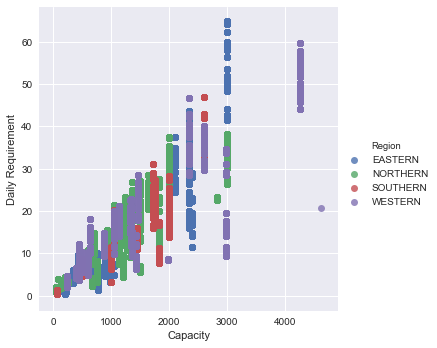

In [352]:
sns.lmplot('Capacity', 'Daily Requirement',
           data=df1,
           fit_reg=False,
           hue="Region"
          )
plt.show()

'''There are no plants with higher capacity than 2800 in southern region
    Western region is the only region with higher capacity than 3000
'''

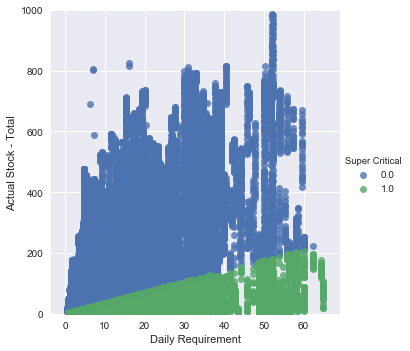

In [59]:
sns.lmplot('Daily Requirement', 'Actual Stock - Total',
           data=df1,
           fit_reg=False,
           hue="Super Critical"
          )
plt.ylim(0, 1000)
plt.show()

'''Super critical days/incidents seem to increase with the increase in Daily requirtement, however when Actual stock total touches 200 the incidents do not happen'''

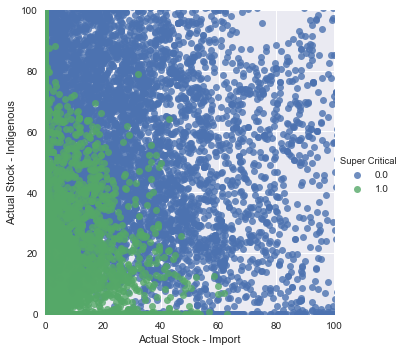

In [61]:
sns.lmplot('Actual Stock - Import', 'Actual Stock - Indigenous',
           data=df1,
           fit_reg=False,
           hue="Super Critical"
          )
plt.ylim(0,100)
plt.xlim(0,100)
plt.show()

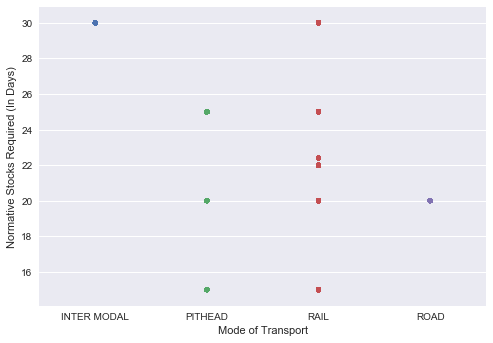

In [375]:
sns.stripplot(x="Mode of Transport", y="Normative Stocks Required (In Days)", data=df1);
plt.show()

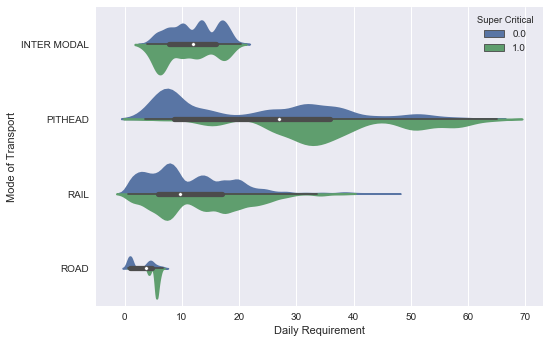

In [44]:
sns.violinplot(y="Mode of Transport", x="Daily Requirement", data=df1, hue='Super Critical', split = True);
plt.show()

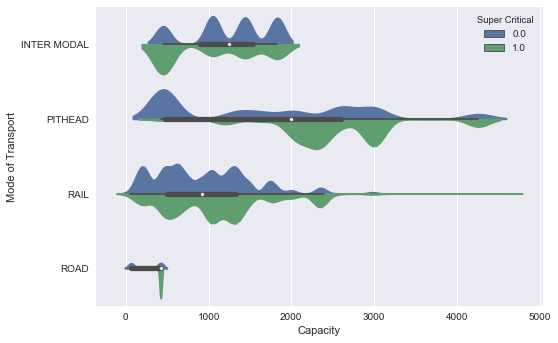

In [78]:
sns.violinplot(y="Mode of Transport", x="Capacity", data=df1, hue='Super Critical', split = True);
plt.show()

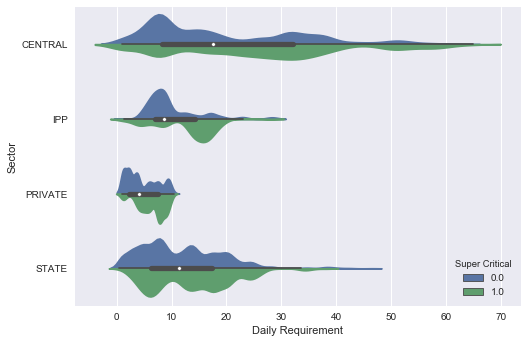

In [43]:
sns.violinplot(y="Sector", x="Daily Requirement", data=df1, hue='Super Critical', split = True);
plt.show()

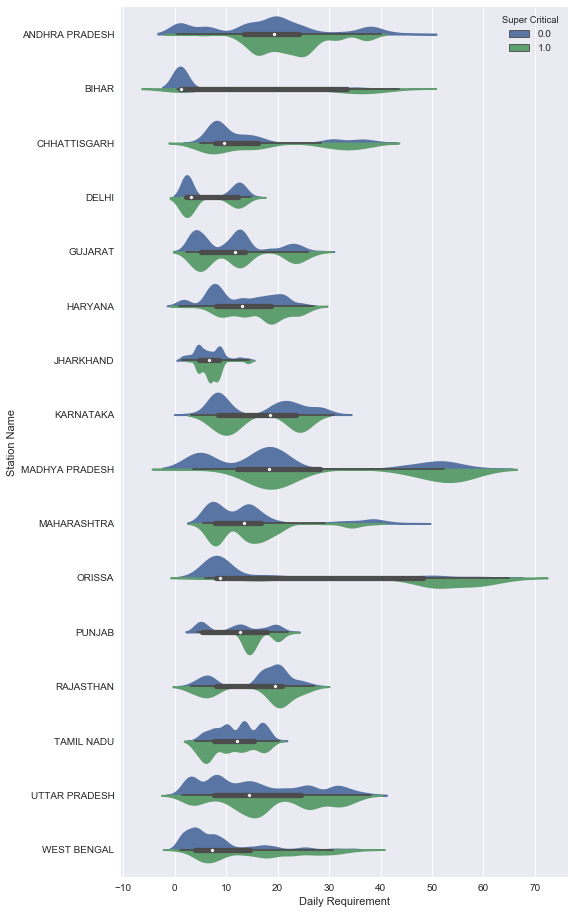

In [53]:
plt.figure(figsize=(8,16))
sns.violinplot(y="Station Name", x="Daily Requirement", data=df1, hue='Super Critical', split = True);

plt.show()

In [16]:
#Normalizing the data

df1['Daily_Percent']=(df1['Daily Requirement']/df1.Capacity)*100
df1['Indigenous_Percent'] = (df1['Actual Stock - Indigenous']/df1.Capacity)*100
df1['Import_Percent'] = (df1['Actual Stock - Import']/df1.Capacity)*100
df1['Total_Percent'] = (df1['Actual Stock - Total']/df1.Capacity)*100

In [25]:
df1.head()

,Station Name.1,level_1,Region,Station Name,Mode of Transport,Utility,Sector,Capacity,Normative Stocks Required (In Days),Daily Requirement,...,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days,Critical,Super Critical,Remarks,Daily_Percent,Indigenous_Percent,Import_Percent,Total_Percent
0,AMAR KANTAK,2009-01-01,WESTERN,MADHYA PRADESH,PITHEAD,M. P. POWER GENERATING CORPORATION LIMITED,STATE,490.0,15.0,5.7,...,102.44,102.44,18.0,0.0,0.0,NaN,1.163265,20.906122,0.0,20.906122
1,AMAR KANTAK,2009-01-02,WESTERN,MADHYA PRADESH,PITHEAD,M. P. POWER GENERATING CORPORATION LIMITED,STATE,490.0,15.0,5.7,...,102.44,102.44,18.0,0.0,0.0,NaN,1.163265,20.906122,0.0,20.906122
2,AMAR KANTAK,2009-01-03,WESTERN,MADHYA PRADESH,PITHEAD,M. P. POWER GENERATING CORPORATION LIMITED,STATE,490.0,15.0,5.7,...,102.37,102.37,18.0,0.0,0.0,NaN,1.163265,20.891837,0.0,20.891837
3,AMAR KANTAK,2009-01-04,WESTERN,MADHYA PRADESH,PITHEAD,M. P. POWER GENERATING CORPORATION LIMITED,STATE,490.0,15.0,5.7,...,102.65,102.65,18.0,0.0,0.0,NaN,1.163265,20.948980,0.0,20.948980
4,AMAR KANTAK,2009-01-05,WESTERN,MADHYA PRADESH,PITHEAD,M. P. POWER GENERATING CORPORATION LIMITED,STATE,490.0,15.0,5.7,...,102.15,102.15,18.0,0.0,0.0,NaN,1.163265,20.846939,0.0,20.846939


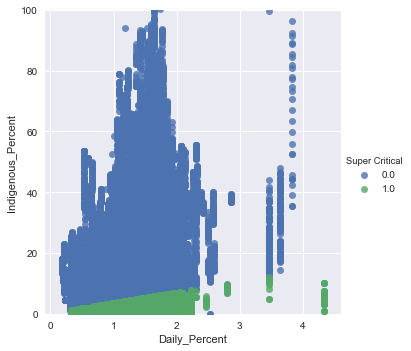

In [58]:
sns.lmplot('Daily_Percent', 'Indigenous_Percent',
           data=df1,
           fit_reg=False,
           hue="Super Critical"
          )
plt.ylim(0,100)
plt.show()

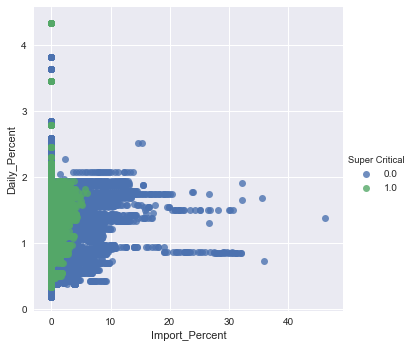

In [40]:
sns.lmplot('Import_Percent', 'Daily_Percent',
           data=df1,
           fit_reg=False,
           hue="Super Critical"
          )
plt.show()

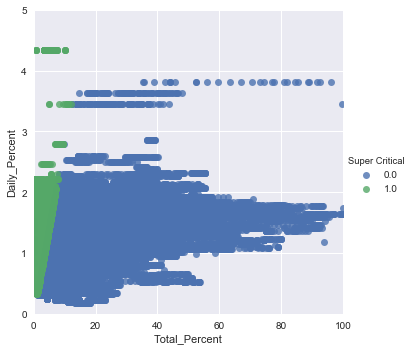

In [65]:
sns.lmplot('Total_Percent', 'Daily_Percent',
           data=df1,
           fit_reg=False,
           hue="Super Critical"
          )
plt.xlim(0,100)
plt.ylim(0,5)
plt.show()

In [79]:
values = df1[df1['Super Critical'] == 1]
values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25409 entries, 171 to 121514
Data columns (total 21 columns):
Station Name.1                         25409 non-null category
level_1                                25409 non-null datetime64[ns]
Region                                 25409 non-null category
Station Name                           25409 non-null category
Mode of Transport                      25409 non-null category
Utility                                25409 non-null category
Sector                                 25409 non-null category
Capacity                               25409 non-null float64
Normative Stocks Required (In Days)    25409 non-null float64
Daily Requirement                      25409 non-null float64
Actual Stock - Import                  25409 non-null float64
Actual Stock - Indigenous              25409 non-null float64
Actual Stock - Total                   25409 non-null float64
Actual Stock - Days                    25409 non-null float64
Critica

In [66]:
'''We currently have labeled data for Super Critical days occured previously, we can use this data to train our model to predict the nexy day when Super Critical state will occur
    In order to use the Super critical label we will have to move the label by 1 upwards for each station
    
'''



def change_critical_value(daf):
    daf['Super Critical'] = daf['Super Critical'].shift(-1) ## shift up
    
    return daf

df2 = df1.groupby('Station Name.1').apply(change_critical_value)

In [67]:
values = df2[df2['Super Critical'] == 1]
values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25367 entries, 170 to 121513
Data columns (total 21 columns):
Station Name.1                         25367 non-null category
level_1                                25367 non-null datetime64[ns]
Region                                 25367 non-null category
Station Name                           25367 non-null category
Mode of Transport                      25367 non-null category
Utility                                25367 non-null category
Sector                                 25367 non-null category
Capacity                               25367 non-null float64
Normative Stocks Required (In Days)    25367 non-null float64
Daily Requirement                      25367 non-null float64
Actual Stock - Import                  25367 non-null float64
Actual Stock - Indigenous              25367 non-null float64
Actual Stock - Total                   25367 non-null float64
Actual Stock - Days                    25367 non-null float64
Critica

In [68]:
df2['Super Critical'].fillna(0, inplace=True)

In [70]:
values = df2[df2['Super Critical'] == 1]
values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25367 entries, 170 to 121513
Data columns (total 21 columns):
Station Name.1                         25367 non-null category
level_1                                25367 non-null datetime64[ns]
Region                                 25367 non-null category
Station Name                           25367 non-null category
Mode of Transport                      25367 non-null category
Utility                                25367 non-null category
Sector                                 25367 non-null category
Capacity                               25367 non-null float64
Normative Stocks Required (In Days)    25367 non-null float64
Daily Requirement                      25367 non-null float64
Actual Stock - Import                  25367 non-null float64
Actual Stock - Indigenous              25367 non-null float64
Actual Stock - Total                   25367 non-null float64
Actual Stock - Days                    25367 non-null float64
Critica

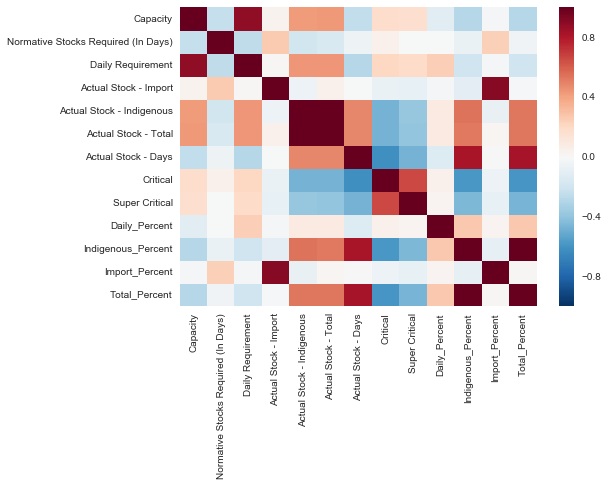

In [20]:
corre = df2.corr(method='pearson')
sns.heatmap(corre)
plt.show()

In [71]:
labels = df2['Super Critical']
features= df2.drop(['Total_Percent','Critical','Daily Requirement', 'Actual Stock - Indigenous', 'Actual Stock - Total', 'Actual Stock - Import', 'Super Critical','Remarks'], axis=1)

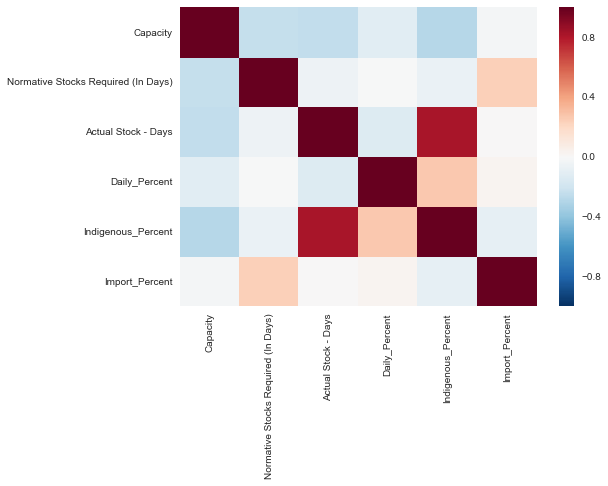

In [23]:
corre = features.corr(method='pearson')
sns.heatmap(corre)
plt.show()

In [72]:
cat_col = df.select_dtypes(['category']).columns
features[cat_col] = features[cat_col].apply(lambda x: x.cat.codes)

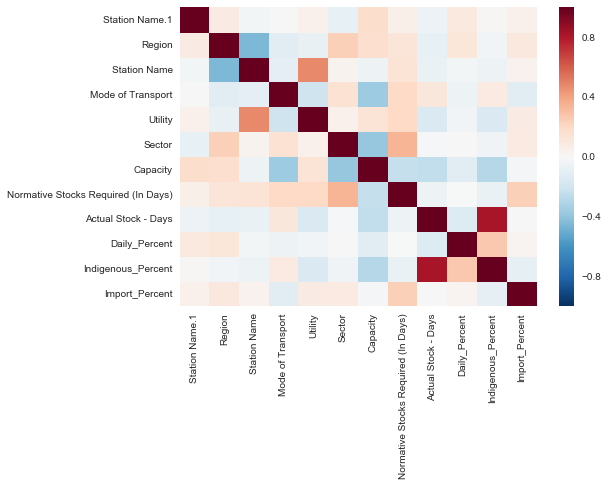

In [25]:
corre = features.corr(method='pearson')
sns.heatmap(corre)
plt.show()

In [73]:
features.set_index('level_1', inplace=True)
features.head()

,Station Name.1,Region,Station Name,Mode of Transport,Utility,Sector,Capacity,Normative Stocks Required (In Days),Actual Stock - Days,Daily_Percent,Indigenous_Percent,Import_Percent
level_1,,,,,,,,,,,,
2009-01-01,0,3,8,1,18,3,490.0,15.0,18.0,1.163265,20.906122,0.0
2009-01-02,0,3,8,1,18,3,490.0,15.0,18.0,1.163265,20.906122,0.0
2009-01-03,0,3,8,1,18,3,490.0,15.0,18.0,1.163265,20.891837,0.0
2009-01-04,0,3,8,1,18,3,490.0,15.0,18.0,1.163265,20.948980,0.0
2009-01-05,0,3,8,1,18,3,490.0,15.0,18.0,1.163265,20.846939,0.0


In [74]:
from sklearn.model_selection import train_test_split
from time import time
import numpy as np
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])


Training set has 97509 samples.
Testing set has 24378 samples.


In [75]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: data training set
       - y_train: label training set
       - X_test: data testing set
       - y_test: label testing set
    '''
    
    results = {}
    
    sample_size=int(sample_size)
    
    #  Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train.iloc[:sample_size, :], y_train[:sample_size])
    end = time() # Get end time
    
    #  Calculate the training time
    results['train_time'] = end-start
        
    #  Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train.iloc[:300, :])
    end = time() # Get end time
    
    #  Calculate the total prediction time
    results['pred_time'] = end-start
            
    #  Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train.iloc[:300], predictions_train, sample_weight=None)
        
    #  Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test, sample_weight=None)
    
    #  Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train.iloc[:300], predictions_train, beta=0.5)
        
    #  Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results
def evaluate(results):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 3, figsize = (11,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j/3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j/3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j/3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j/3, j%3].set_xlabel("Training Set Size")
                ax[j/3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    pl.tight_layout()
    pl.show()

DecisionTreeClassifier trained on 975 samples.
DecisionTreeClassifier trained on 9750 samples.
DecisionTreeClassifier trained on 97509 samples.
LogisticRegression trained on 975 samples.
LogisticRegression trained on 9750 samples.
LogisticRegression trained on 97509 samples.
GradientBoostingClassifier trained on 975 samples.
GradientBoostingClassifier trained on 9750 samples.
GradientBoostingClassifier trained on 97509 samples.


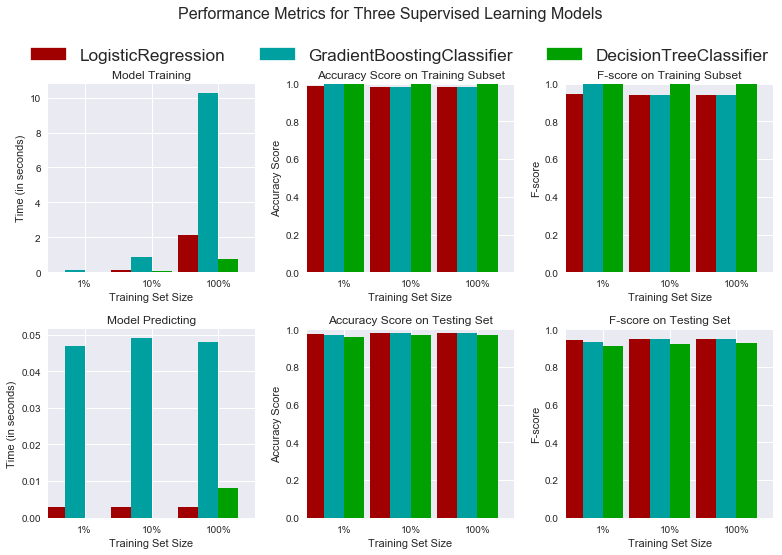

In [76]:
#  Import the supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the three models
clf_A = DecisionTreeClassifier(random_state=5)
clf_B = LogisticRegression(random_state=8)
clf_C = GradientBoostingClassifier()

#  Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = 0.01 * X_train.shape[0]
samples_10 = 0.1 * X_train.shape[0]
samples_100 = X_train.shape[0]

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the supervised learning models chosen
evaluate(results)

In [77]:
pd.value_counts(y_test)

0.0    19258
1.0     5120
Name: Super Critical, dtype: int64